In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv('./results/cnn2s/114001_out.csv') 
df1['ann'] = df1['true']
df2 = pd.read_csv('./results/cnn2s/124001_out.csv') 
df2['ann'] = df2['true']
df3 = pd.read_csv('./results/cnn2s/hydronaut_bad_5_out.csv') 
df4 = pd.read_csv('./results/cnn2s/hydronaut_good_10_out.csv') 
df5 = pd.read_csv('./results/cnn2s/hydronaut_good_2_out.csv') 
df6 = pd.read_csv('./results/cnn2s/hydronaut_good_6_out.csv') 

In [3]:
df1.columns, df2.columns, df3.columns, df4.columns, df5.columns, df6.columns

(Index(['Unnamed: 0', 'true', 'cnn2s', 'ann'], dtype='object'),
 Index(['Unnamed: 0', 'true', 'cnn2s', 'ann'], dtype='object'),
 Index(['Unnamed: 0', 'Data', 'ann', 'cnn2s'], dtype='object'),
 Index(['Unnamed: 0', 'Data', 'ann', 'cnn2s'], dtype='object'),
 Index(['Unnamed: 0', 'Data', 'ann', 'cnn2s'], dtype='object'),
 Index(['Unnamed: 0', 'Data', 'ann', 'cnn2s'], dtype='object'))

In [4]:
df = pd.concat([df1, df2, df3, df4, df5, df6])
df = df[['ann', 'cnn2s']]

In [5]:
from ecg_quality.ECGQualityChecker import ECGQualityChecker  
checker = ECGQualityChecker(return_mode='three_value')  

df = df[df['ann'] != 0]
# na cnn2s este musime aplikovat thresholdy z kniznice, to sme zabudli pri ziskavani data
df['cnn2s'] = checker._get_three_value(df['cnn2s'])

df

2023-12-31 09:52:39.181383: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-31 09:52:39.181438: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-31 09:52:39.182624: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-31 09:52:39.189132: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-31 09:52:39.957779: W tensorflow/comp

ann  cnn2s
2803688    2    2.0
2803689    2    2.0
2803690    2    2.0
2803691    2    2.0
2803692    2    2.0
...      ...    ...
14916      1    3.0
14917      1    3.0
14918      1    3.0
14919      1    3.0
14920      1    3.0

[3269532 rows x 2 columns]

In [6]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, confusion_matrix
from sklearn.utils.multiclass import unique_labels
import itertools
import numpy as np

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    # classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

<Axes: title={'center': 'CNN2s confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

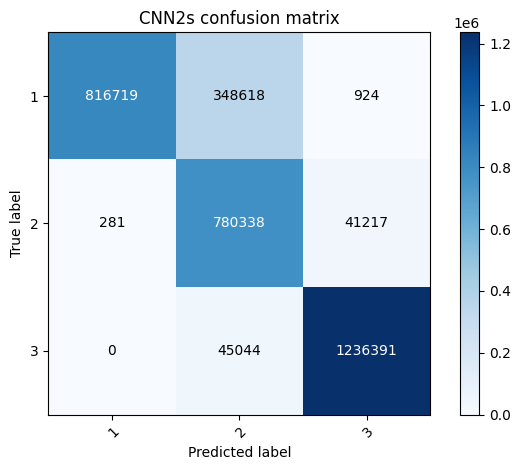

In [17]:
plot_confusion_matrix(df['ann'], df['cnn2s'], classes=[1, 2, 3], title='CNN2s confusion matrix')

<Axes: title={'center': 'Normalized CNN2s confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

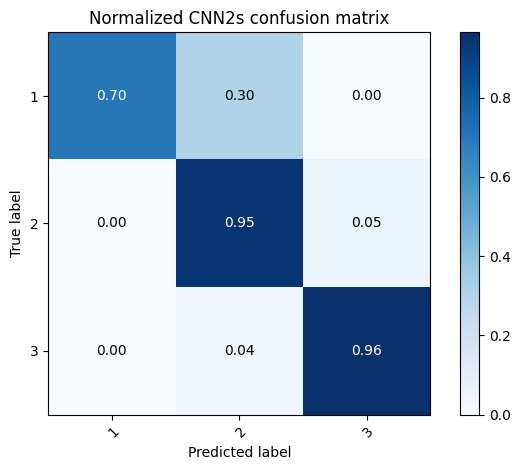

In [18]:
plot_confusion_matrix(df['ann'], df['cnn2s'], classes=[1, 2, 3], title='Normalized CNN2s confusion matrix', normalize=True)

In [10]:
accuracy_score(df['ann'], df['cnn2s'])

0.8666218896160062

In [11]:
precision_score(df['ann'], df['cnn2s'], average=None)

array([0.99965606, 0.66468313, 0.96703954])

In [12]:
recall_score(df['ann'], df['cnn2s'], average=None)

array([0.70028836, 0.94950574, 0.96484878])

In [13]:
f1_score(df['ann'], df['cnn2s'], average=None)

array([0.82361222, 0.78196605, 0.96594292])

In [14]:
f1_score(df['ann'], df['cnn2s'], average='weighted')

0.8689279486386111

In [15]:
len(df[df['ann'] > df['cnn2s']]) / len(df) 

0.013862840308643562

In [23]:
checker.model.model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 496, 10)           60        
                                                                 
 batch_normalization (Batch  (None, 496, 10)           40        
 Normalization)                                                  
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 496, 10)           0         
                                                                 
 dropout (Dropout)           (None, 496, 10)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 492, 10)           510       
                                                                 
 batch_normalization_1 (Bat  (None, 492, 10)           40        
 chNormalization)                                       